In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from sklearn import tree

# First step into machine learning beyond classic regression

In [114]:
# Warm Up
R1 = np.array([5,8,9])
R2 = np.array([1,0,20])

# my addition
R0 = np.array([2,6])
#R0 = np.array([0,4])

Calculate the a) Gini co-efficient and b) entropy for R1. Then, write a function that takes in a normalized vector and outputs the Gini co-efficent and Entropy.

In [115]:
# a) Gini 
total = np.sum(R1)
#1 - ((R1[0]/total)**2 + (R1[1]/total)**2 + (R1[2]/total)**2)
#1 - ((R0[0]/total)**2 + (R0[1]/total)**2)

1 - (np.sum([(x/total)**2 for x in R1]))

0.6487603305785123

In [116]:
# b) entropy 
total = np.sum(R0)
#-np.log2(0)

# doesn't work with 0s
-np.sum([((x/total) * np.log(x/total)) for x in R0 if x > 0])

0.5623351446188083

In [117]:
def my_cost_measures(v):

    gini = 1 - (np.sum([(x/total)**2 for x in v]))

    entropy = -np.sum([((x/total) * np.log(x/total)) for x in v if x > 0])

    return gini, entropy 
    

Calculate the weighted sums.

In [118]:
gini1, entropy1 = my_cost_measures(R1)
gini2, entropy2 = my_cost_measures(R2)

In [119]:
print(gini1, entropy1)
print(gini2, entropy2)

-1.65625 0.16124635316515337
-5.265625 -2.0307966369754085


# Decision Trees

Here, we will implement once again the titanic dataset.

In [83]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


There are missing values for age. Replace the nans with the median age.

In [90]:
# your code
len(titanic["age"].isna())
titanic["age"] = titanic.age.fillna(titanic["age"].median())
len(titanic["age"].isna())

891

Drop the following columns: 'who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive'

In [125]:
# your code
drop_cols = ['who', 'embarked', 'parch', 'fare', 'deck', 'embark_town', 'alive']
titanic.drop(columns = drop_cols)

,survived,pclass,sex,age,sibsp,class,adult_male,alone
0,0,3,male,22.0,1,Third,True,False
1,1,1,female,38.0,1,First,False,False
2,1,3,female,26.0,0,Third,False,True
3,1,1,female,35.0,1,First,False,False
4,0,3,male,35.0,0,Third,True,True
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,Second,True,True
887,1,1,female,19.0,0,First,False,True
888,0,3,female,28.0,1,Third,False,False
889,1,1,male,26.0,0,First,True,True


Using label_encoder, transform the dataset into integer encodings.

In [126]:
# Convert categorical columns to numeric using Label Encoding
label_encoder = LabelEncoder()

titanic['sex'] = label_encoder.fit_transform(titanic['sex'])  # Male: 1, Female: 0
titanic['class'] = label_encoder.fit_transform(titanic['class'])  # 1st, 2nd, 3rd -> 0, 1, 2
titanic['alone'] = label_encoder.fit_transform(titanic['alone'])

# Set-up your training by specifying X and y

Use train_test_split to split the data and train.

In [161]:
# Define features (X) and target (y)
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'class', 'adult_male', 'alone']]
feature_names = ['pclass', 'sex', 'age', 'sibsp', 'class', 'adult_male', 'alone']
y = titanic.survived 

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (712, 7), Test set shape: (179, 7)


In [162]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=2)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

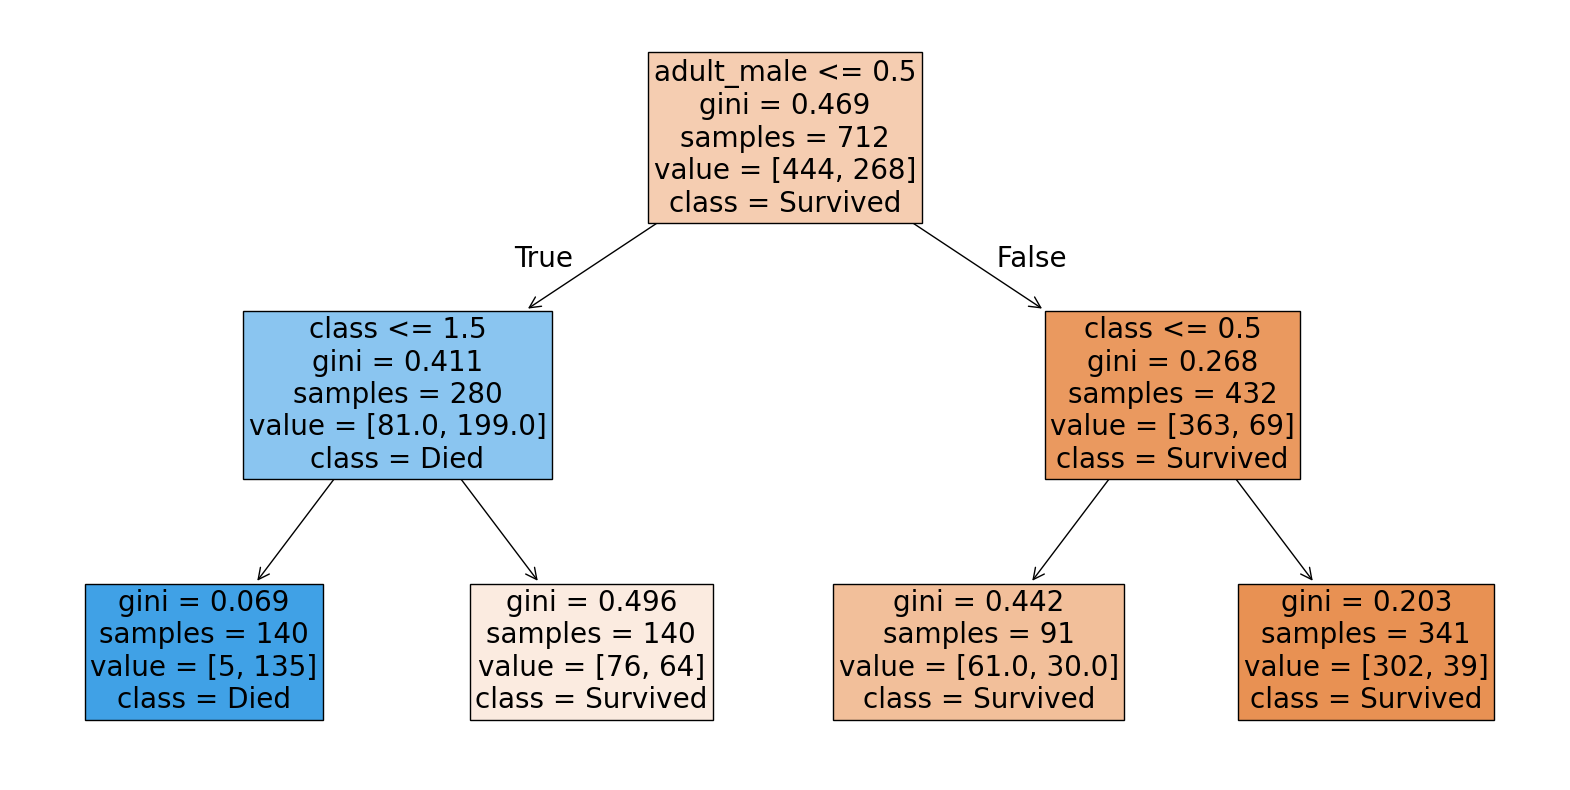

In [163]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, 
                   feature_names=feature_names,  
                   class_names=["Survived", "Died"],
                   filled=True, max_depth=3,fontsize=20,
      )
print("")

### Evaluating your results
Now that you have your predicted values and actual values, plot a scatter plot and give the R2. What do you see?

<Axes: xlabel='survived'>

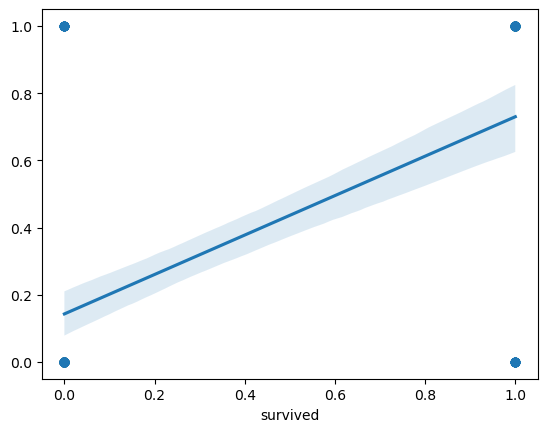

In [187]:
sns.regplot(y=y_pred_dt, x=y_test)
# slope is getting pulled down 
# see what true positives and negatives you have 

Calculate the accuracy, recall, and precision. Then, use the function confusion_matrix and sns.heatmap to plot a confusion matrix.

In [186]:
# Your Code
#accuracy = (len(y_pred_dt == 1) / len(y_test == 1))
#accuracy

from sklearn.metrics import accuracy_score, recall_score, precision_score

print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

0.8044692737430168
0.7297297297297297
0.782608695652174
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

[[90 15]
 [20 54]]


### Change the cost criterion from Gini to entropy
Does this change the performance metric?

In [ ]:
# Your code

In [179]:
# Create and train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42, criterion='entropy',max_depth=2)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree.predict(X_test)

print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# No, doesn't change the metrics, this yields the same result 

0.776536312849162
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       105
           1       0.90      0.51      0.66        74

    accuracy                           0.78       179
   macro avg       0.82      0.74      0.74       179
weighted avg       0.81      0.78      0.76       179

[[101   4]
 [ 36  38]]


### Hyperparameter tuning: How does performance change with increased max depth?
Write code that increases the max depth from 1 to 5, then plot on one figure how this impacts the accuracy, recall, and precision.

In [188]:
acc_hist = []
rec_hist = []
prec_hist = []

for i in range(5):

    # Create and train the Decision Tree Classifier
    decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth=i+1)
    decision_tree.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_dt = decision_tree.predict(X_test)

    acc_hist.append(accuracy_score(y_test, y_pred_dt))
    rec_hist.append(recall_score(y_test, y_pred_dt))
    prec_hist.append(precision_score(y_test, y_pred_dt))

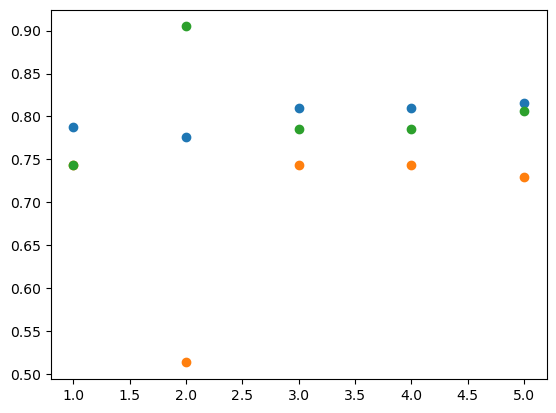

In [198]:
iterations = [1,2,3,4,5]
plt.scatter(x = iterations, y = acc_hist)
plt.scatter(x = iterations, y = rec_hist)
plt.scatter(x = iterations, y = prec_hist)

# Random Forest

Use the function RandomForestClassifier to train a classifier. 

In [180]:
%%time
# Your Code
# Create and train the Random Forest Classifier
rand_tree = RandomForestClassifier(random_state=42, criterion='gini',max_depth=2)
rand_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = rand_tree.predict(X_test)

CPU times: user 70.2 ms, sys: 12.2 ms, total: 82.4 ms
Wall time: 82 ms


How does this compare to the decision tree?

In [181]:
print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# This is about 3% more accurate!

0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

[[90 15]
 [20 54]]


## Grid search: Choose 10 values for n_estimators and 10 values for max_depth
#### Plot a heatmap that shows the grid search on these values

# Practice with a larger, multilabeled dataset

Seven types of tree cover:
* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
columns = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
    'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
    'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
    'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
    'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
    'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40',
    'Cover_Type'
]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)


Split the data like above, train a decision tree and RF model, then compare the two.